In [1]:
# fetch eth hourly data

import configparser
import datetime

from utils import utils

config = configparser.ConfigParser()
config.read("../../conf/config.ini")
api_key = config.get("POLYGON", "api_key")

start_time = utils.date_to_utc_timestamp(datetime.datetime(2023, 7, 3, 0, 0)) * 1000
end_time = utils.date_to_utc_timestamp(datetime.datetime(2023, 7, 3, 0, 0)) * 1000
print(start_time, end_time)

1688342400000 1688342400000


In [2]:
import requests

response_data = requests.get("https://api.polygon.io/v2/aggs/ticker/X:ETHUSD/range/1/hour/{start_unix_ms}/{end_unix_ms}?adjusted=true&sort=asc&limit=2000&apiKey={api_key}".format(
    start_unix_ms=start_time,
    end_unix_ms=start_time + 3600 * 1000,
    api_key=api_key
)).json()
print(response_data)

{'ticker': 'X:ETHUSD', 'queryCount': 120, 'resultsCount': 2, 'adjusted': True, 'results': [{'v': 5520.5751596300015, 'vw': 1937.2693, 'o': 1937.28, 'c': 1934.88, 'h': 1944, 'l': 1933.46, 't': 1688342400000, 'n': 8579}, {'v': 7506.1982382900005, 'vw': 1943.9752, 'o': 1934.78, 'c': 1945.25, 'h': 1951.1, 'l': 1934.51, 't': 1688346000000, 'n': 10183}], 'status': 'OK', 'request_id': '127da8bde631281a94aff658f92aa1a4', 'count': 2}


In [3]:
current_time = start_time
time_gap = 23 * 3600 * 1000
result = []

In [4]:
import requests
import time

while current_time <= end_time:
    print(utils.utc_timestamp_to_datetime_ms_str(current_time), "result length:", len(result))
    url = "https://api.polygon.io/v2/aggs/ticker/X:ETHUSD/range/1/hour/{start_unix_ms}/{end_unix_ms}?adjusted=true&sort=asc&limit=2000&apiKey={api_key}".format(
        start_unix_ms=current_time,
        end_unix_ms=current_time + time_gap,
        api_key=api_key
    )
    response = requests.get(url)
    result += response.json()["results"]
    current_time += time_gap + 3600 * 1000
    time.sleep(12)

2023-07-03 00:00:00.000 result length: 0


In [5]:
import pandas as pd

df = pd.read_csv("../../data/eth_usd_polygon_20230718.csv")
df_new = pd.DataFrame(result)
df = pd.concat([df, df_new], ignore_index=True)
df.head()

,v,vw,o,c,h,l,t,n
0,9809.273476,1942.7081,1940.49,1952.54,1958.700000,1928.00,1654041600000,30746
1,6089.567718,1946.3557,1954.20,1946.57,1954.200000,1940.00,1654045200000,23571
2,8278.776988,1935.8301,1946.46,1939.03,1947.349248,1928.98,1654048800000,25013
3,7490.516503,1931.0554,1938.94,1928.44,1940.243055,1925.36,1654052400000,21634
4,10282.469141,1924.8137,1928.38,1932.54,1935.900000,1912.03,1654056000000,25834


In [8]:
df.sort_values(by=["t"], inplace=True)

In [9]:
df.to_csv("../../data/eth_usd_polygon_20230718.csv", index=False)

In [7]:
from utils import utils

df["datetime"] = df["t"].apply(lambda x: utils.utc_timestamp_to_datetime_ms_str(x))
df.head()

,v,vw,o,c,h,l,t,n,datetime
0,14723.985699,1747.9319,1732.70,1755.01,1764.41,1729.6,1679356800000,22373,2023-03-21 00:00:00.000
1,6118.455979,1753.9277,1755.03,1758.24,1761.83,1741.0,1679360400000,16842,2023-03-21 01:00:00.000
2,5610.478199,1756.3725,1758.23,1754.88,1760.28,1747.4,1679364000000,13722,2023-03-21 02:00:00.000
3,4823.031415,1751.5688,1754.95,1752.18,1758.40,1743.2,1679367600000,11213,2023-03-21 03:00:00.000
4,3533.792342,1754.7414,1752.19,1753.14,1760.05,1745.1,1679371200000,10625,2023-03-21 04:00:00.000


In [3]:
import pandas as pd

from utils import utils

df = pd.read_csv("../data/eth_usd_polygon_20230703.csv")
df["datetime"] = df["t"].apply(lambda x: utils.utc_timestamp_to_datetime_ms_str(x))
df = df[df["datetime"] >= "2023-03-21"]
df.reset_index(inplace=True, drop=True)
df.head()

,v,vw,o,c,h,l,t,n,datetime
0,14723.985699,1747.9319,1732.70,1755.01,1764.41,1729.6,1679356800000,22373,2023-03-21 00:00:00.000
1,6118.455979,1753.9277,1755.03,1758.24,1761.83,1741.0,1679360400000,16842,2023-03-21 01:00:00.000
2,5610.478199,1756.3725,1758.23,1754.88,1760.28,1747.4,1679364000000,13722,2023-03-21 02:00:00.000
3,4823.031415,1751.5688,1754.95,1752.18,1758.40,1743.2,1679367600000,11213,2023-03-21 03:00:00.000
4,3533.792342,1754.7414,1752.19,1753.14,1760.05,1745.1,1679371200000,10625,2023-03-21 04:00:00.000


In [4]:
df.describe()

,v,vw,o,c,h,l,t,n
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2.496000e+03,2496.000000
mean,5757.374336,1851.420521,1851.529816,1851.594191,1858.160909,1844.667925,1.683848e+12,10524.735176
std,6147.964836,84.800175,84.834413,84.850380,85.161871,84.272231,2.594439e+09,6425.184288
min,517.501734,1629.274000,1632.200000,1632.210000,1641.400000,1620.060000,1.679357e+12,2813.000000
25%,2260.316372,1805.101350,1805.430000,1805.525000,1810.600000,1798.945000,1.681602e+12,6487.250000
50%,3926.479765,1848.910550,1848.795000,1848.575000,1855.200000,1842.760000,1.683848e+12,8907.500000
75%,6835.402647,1894.116750,1894.772500,1894.782500,1900.595000,1887.772500,1.686093e+12,12630.750000
max,78143.793488,2131.975200,2130.200000,2130.980000,2146.500000,2118.700000,1.688339e+12,78277.000000


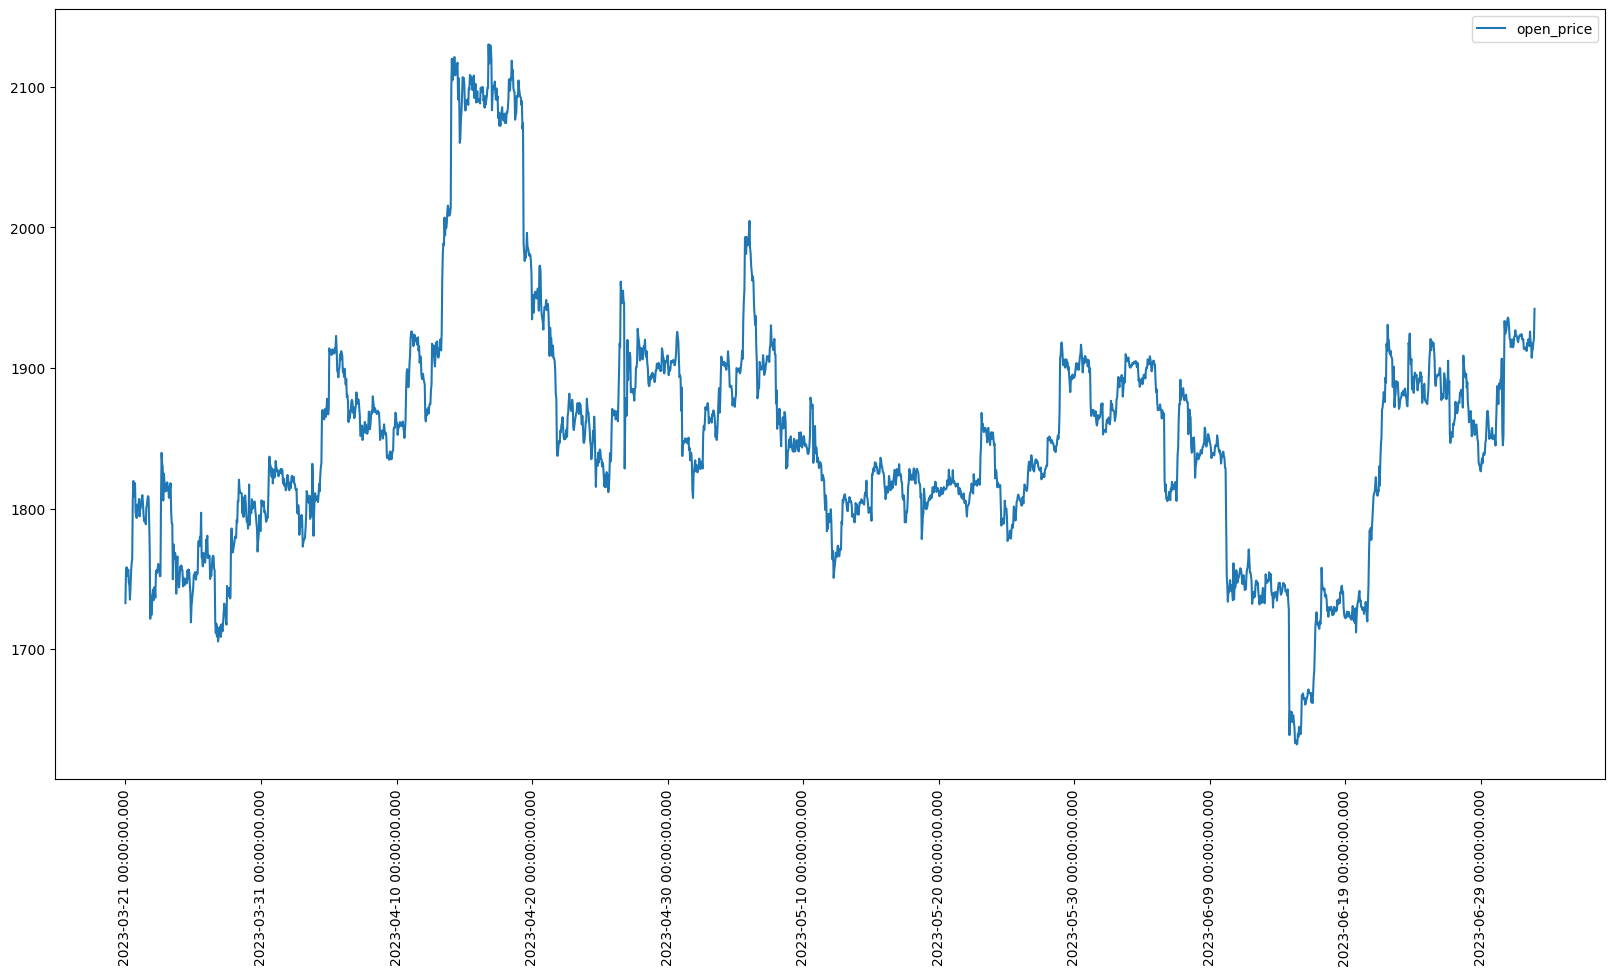

In [5]:
import matplotlib.pyplot as plt

def get_plot(plt_df):
    plt.figure(figsize=(20, 10))
    plt.plot(plt_df["datetime"], plt_df["o"], label="open_price")
    plt.xticks(plt_df["datetime"][::240], rotation=45)
    plt.legend()
    return plt

# train_df = df.head(60)
# plot = get_plot(train_df)
plot = get_plot(df)
plot.show()

In [25]:
stats = df.o.value_counts(bins=[1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150]).sort_index()
# stats["o_day"] = stats["o"] / 24
# stats.head()
stats_df = pd.DataFrame(stats)
stats_df.columns = ["hour_count"]
stats_df["day_count"] = stats_df["hour_count"] / 24
stats_df["rate"] = stats_df["hour_count"] / len(df)
stats_df.head(20)

,hour_count,day_count,rate
"(1599.999, 1650.0]",16,0.666667,0.006410
"(1650.0, 1700.0]",30,1.250000,0.012019
"(1700.0, 1750.0]",241,10.041667,0.096554
"(1750.0, 1800.0]",269,11.208333,0.107772
"(1800.0, 1850.0]",720,30.000000,0.288462
"(1850.0, 1900.0]",673,28.041667,0.269631
"(1900.0, 1950.0]",356,14.833333,0.142628
"(1950.0, 2000.0]",52,2.166667,0.020833
"(2000.0, 2050.0]",11,0.458333,0.004407
"(2050.0, 2100.0]",88,3.666667,0.035256


array([[<AxesSubplot: title={'center': 'o'}>]], dtype=object)

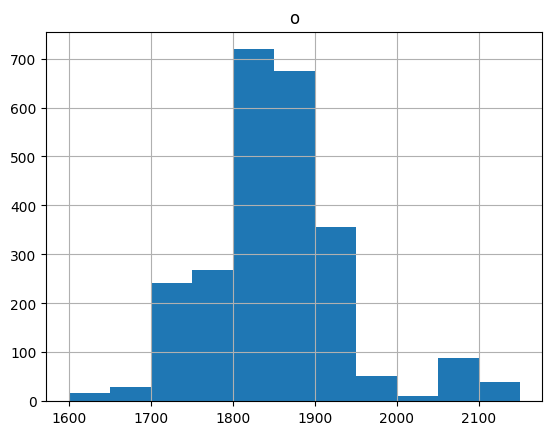

In [8]:
df.hist(column="o", bins=[1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150])

array([[<AxesSubplot: title={'center': 'o'}>]], dtype=object)

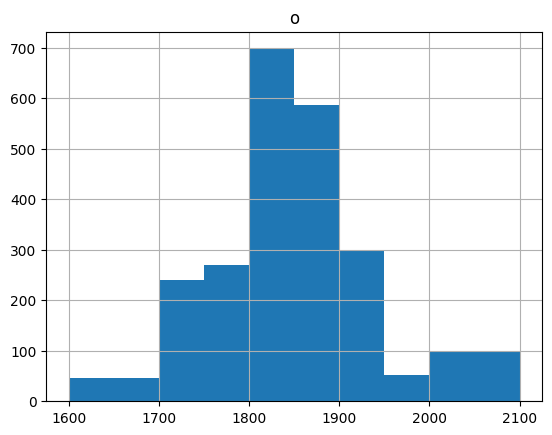

In [29]:
df[df["datetime"] < "2023-06-26"].hist(column="o", bins=[1600, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2100])

In [17]:
df.o.value_counts(bins=[1600, 1700, 1800, 1900, 2000, 2100, 2200]).sort_index()

(1599.999, 1700.0]      46
(1700.0, 1800.0]       510
(1800.0, 1900.0]      1393
(1900.0, 2000.0]       408
(2000.0, 2100.0]        99
(2100.0, 2200.0]        40
Name: o, dtype: int64

In [10]:
df[df["datetime"] < "2023-06-26"].shape

(2328, 9)

In [28]:
df[df["datetime"] < "2023-06-26"].describe()

,v,vw,o,c,h,l,t,n
count,2328.000000,2328.000000,2328.000000,2328.000000,2328.000000,2328.00000,2.328000e+03,2328.000000
mean,5785.379630,1849.048766,1849.163655,1849.223136,1855.767075,1842.29064,1.683545e+12,10645.181701
std,6184.201918,86.952172,86.987138,86.996092,87.308196,86.38327,2.419848e+09,6482.961457
min,517.501734,1629.274000,1632.200000,1632.210000,1641.400000,1620.06000,1.679357e+12,2813.000000
25%,2261.209139,1802.266575,1802.810000,1803.057500,1808.175000,1795.19000,1.681451e+12,6540.500000
50%,3914.138630,1843.553800,1843.550000,1843.650000,1849.250000,1837.57000,1.683545e+12,8977.000000
75%,6917.001887,1892.579325,1892.962500,1893.005000,1898.725000,1885.92750,1.685640e+12,12822.000000
max,78143.793488,2131.975200,2130.200000,2130.980000,2146.500000,2118.70000,1.687734e+12,78277.000000
